In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import pandas as pd
tashkent_houses = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv')
tashkent_houses.head()

# import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
# df.head(10)

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0


In [5]:
tashkent_houses.shape

(7278, 7)

In [6]:
tashkent_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7278 non-null   int64  
 1   district    7278 non-null   object 
 2   rooms       7278 non-null   int64  
 3   size        7278 non-null   float64
 4   level       7278 non-null   int64  
 5   max_levels  7278 non-null   int64  
 6   price       7278 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 398.1+ KB


In [7]:
tashkent_houses.describe()

,Unnamed: 0,rooms,size,level,max_levels,price
count,7278.000000,7278.000000,7278.00000,7278.000000,7278.000000,7278.000000
mean,3735.910552,2.578318,70.11898,3.689338,5.992718,54092.074196
std,2162.154719,1.030179,29.32120,2.228360,2.583194,29665.210900
min,0.000000,1.000000,1.00000,1.000000,1.000000,2.000000
25%,1862.250000,2.000000,50.00000,2.000000,4.000000,34800.000000
50%,3737.500000,2.000000,65.00000,3.000000,5.000000,45500.000000
75%,5611.750000,3.000000,83.00000,5.000000,9.000000,65000.000000
max,7464.000000,8.000000,279.00000,18.000000,25.000000,220000.000000


In [8]:
tashkent_houses.value_counts()

Unnamed: 0  district           rooms  size   level  max_levels  price   
0           Юнусабадский       3      57.0   4      4           52000.0     1
4973        Мирзо-Улугбекский  4      90.0   4      5           58000.0     1
4999        Юнусабадский       3      107.0  10     13          80000.0     1
4998        Яккасарайский      5      196.0  3      7           170000.0    1
4997        Яккасарайский      2      55.0   13     13          33500.0     1
                                                                           ..
2488        Мирзо-Улугбекский  3      74.0   4      9           55000.0     1
2487        Мирзо-Улугбекский  2      80.0   6      6           70000.0     1
2486        Мирабадский        2      60.0   8      9           48500.0     1
2485        Мирзо-Улугбекский  2      60.0   8      9           48500.0     1
7464        Чиланзарский       1      30.0   2      4           22914.0     1
Name: count, Length: 7278, dtype: int64

In [9]:
chil_houses = tashkent_houses[tashkent_houses['district'] == 'Чиланзарский']
chil_houses.head()

,Unnamed: 0,district,rooms,size,level,max_levels,price
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0
5,5,Чиланзарский,1,28.0,1,4,25500.0
6,6,Чиланзарский,1,30.0,2,4,21200.0


In [10]:
chil_houses.shape

(1616, 7)

In [11]:
chil_houses.isnull().sum()

Unnamed: 0    0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

--- LABELLING ---

In [12]:
X = chil_houses['size']
X.unique()

array([ 42.  ,  65.  ,  70.  ,  28.  ,  30.  ,  67.  ,  35.  ,  43.  ,
        51.  ,  80.  ,  27.  ,  64.  ,  26.  ,  72.  , 100.  ,  34.  ,
        45.  ,  96.  ,  82.  ,  95.  ,  68.  ,  54.  ,  46.  ,  50.  ,
        36.  ,  60.  ,  90.  ,  48.  ,  94.  ,  85.  , 110.  , 125.  ,
        76.  ,  66.  ,  37.  ,  32.  ,  58.  ,  56.  ,  33.  ,  29.  ,
        47.  ,  52.  ,  92.  ,  44.  ,  55.  ,  49.  , 142.  ,  77.  ,
        24.  ,  41.  ,  75.  ,  98.  , 105.  ,  74.  ,  84.  ,  57.  ,
        73.  ,  78.  , 157.  ,  62.  ,  79.  ,  63.  , 103.  ,  40.  ,
       134.  , 120.  ,  93.  ,  88.  , 124.  , 109.  , 184.  , 140.  ,
       130.  , 104.  ,  20.  ,  17.  , 102.  , 160.  , 118.  ,  83.  ,
       114.  ,  61.  , 136.  , 180.  , 206.  , 115.  ,  68.4 ,  38.  ,
       138.  , 135.  , 132.  ,  97.  ,  91.  , 153.  , 107.  , 161.  ,
       173.  ,  46.23, 188.  ,  69.  , 108.  ,  39.  , 111.  ,  53.  ,
        67.68,  58.9 ,  63.09,  77.5 ,  87.71,  87.  , 169.  ,  25.  ,
      

In [13]:
Y = chil_houses['price']
Y.replace('Договорная', np.nan, inplace=True)
Y.unique()

<ipython-input-13-d226d0853632>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.replace('Договорная', np.nan, inplace=True)


array([ 37000.,  49500.,  55000.,  25500.,  21200.,  22200.,  30200.,
        22500.,  24200.,  56000.,  32000.,  56500.,  35000.,  23500.,
        68000.,  41500.,  97000.,  28500.,  34500.,  48000.,  40000.,
        67000.,  63000.,  70000.,  83000.,  31500.,  26500.,  45000.,
        30000.,  27000.,  38000.,  46500.,  58400.,  47000.,  52500.,
       105000.,  53500.,  42500.,  24000.,  55500.,  41000.,  42000.,
        50500.,  54000.,  52000.,  39000.,  36000.,  28000.,  34000.,
        43500.,  24500.,  23000.,  26000.,  37500.,  36500.,  46000.,
        23800.,  32900.,  29800.,  38500.,  36200.,  43000.,  45500.,
       120000.,  44000.,  64500.,  37700.,  95000.,  20000.,  73000.,
        37400.,  35800.,  60000.,  56600.,  29500.,  57000.,  50000.,
        31000.,  21500.,  32500.,  35500.,  39600., 160000.,  40500.,
        36999.,  36800.,  74000.,  61000.,  20200.,  23200.,  35200.,
        25200.,  26200.,  65000.,  38999.,  44200.,  90000., 140000.,
        26800.,  247

--- GRAPICS --


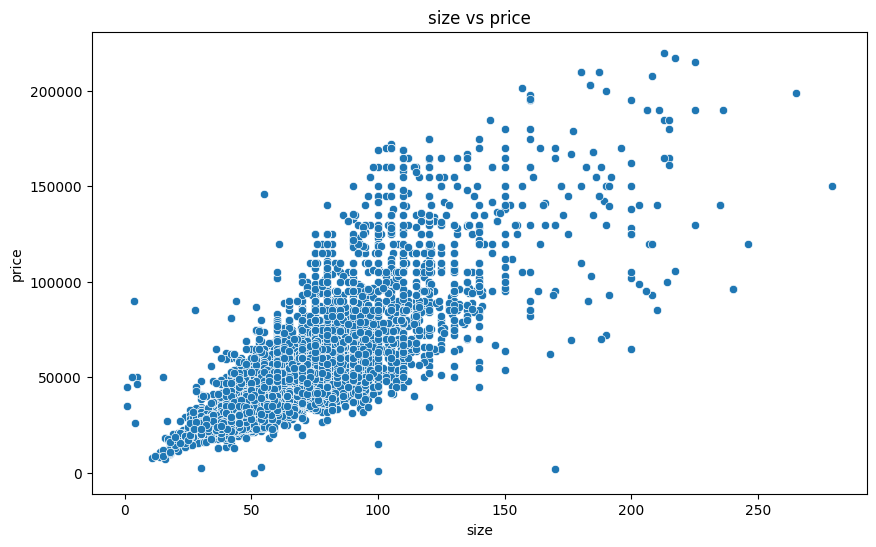

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tashkent_houses, x='size', y='price', )
plt.xlabel('size')
plt.ylabel('price')
plt.title('size vs price')
plt.show()

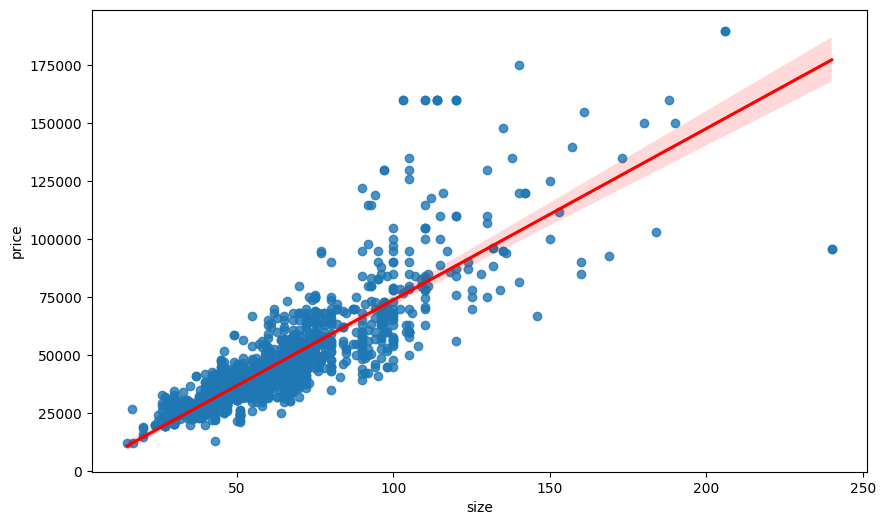

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data=chil_houses, x='size', y='price', line_kws={"color": "red"})
plt.show()

--- LINEAR REGRESSION ---

In [16]:
#using_scikit-learn

chil_houses.shape

(1616, 7)

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(chil_houses, test_size=0.10, random_state=42)

Linear Regression ML

In [19]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Train the model
LR_model.fit(x_train, y_train)

#Find theta1 va theta0
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=732.7784051414766
theta0=106.31843170110369


Text(0, 0.5, 'Price')

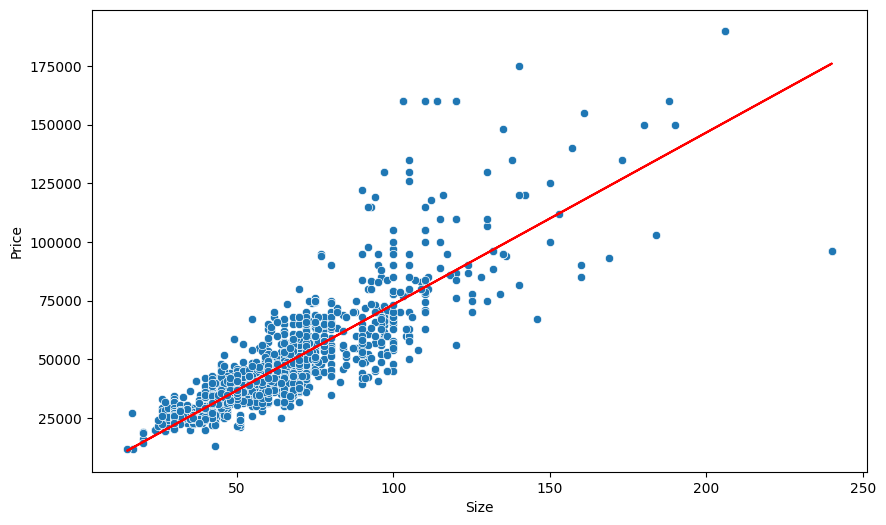

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=chil_houses, x='size', y='price')
y_train = theta1*x_train + theta0
plt.plot(x_train, y_train, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

--- Tessting the model ---

In [22]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [23]:
y_predict = LR_model.predict(x_test)

--- Finding MAE and RMSE ---

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7269.709648262382
RMSE=12734.803748258666
